In [2]:
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from scipy.stats import t
from sklearn.preprocessing import StandardScaler

In [3]:
X,Y=fetch_california_housing(return_X_y=True)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y, shuffle=True, random_state=42)
Xtrain,Ytrain


(array([[   4.2143    ,   37.        ,    5.28823529, ...,    2.52941176,
           33.81      , -118.12      ],
        [   5.3468    ,   42.        ,    6.36432161, ...,    2.40452261,
           37.16      , -121.98      ],
        [   3.9191    ,   36.        ,    6.11006289, ...,    2.23584906,
           38.45      , -122.69      ],
        ...,
        [   2.9344    ,   36.        ,    3.98671727, ...,    3.33206831,
           34.03      , -118.38      ],
        [   5.7192    ,   15.        ,    6.39534884, ...,    3.17889088,
           37.58      , -121.96      ],
        [   2.5755    ,   52.        ,    3.40257649, ...,    2.10869565,
           37.77      , -122.42      ]]),
 array([2.285, 2.799, 1.83 , ..., 2.221, 2.835, 3.25 ]))

In [4]:
#Question 1a)

def computeR2(Xd,Y):
    ''' Compute the score of the linear regression using Xd to predict Y'''
    X=np.array([[1 if i==0 else lst[i-1] for i in range(len(lst)+1)] for lst in Xd])                #Design matrix computation
    G=np.transpose(X)@X                                                                             #We compute the gram matrix
    reg_coeff=np.linalg.inv(G)@np.transpose(X)@Y
    Y_hat=X@reg_coeff                                                                               #We compute an approximation of Y using X
    return np.sum([(y_hat-Y.mean())**2 for y_hat in Y_hat])/np.sum([(y-Y.mean())**2 for y in Y])

def computeMSE(Xd,Y):
    ''' Compute the Mean Squarred Error of the linear regression using Xd to predict Y'''
    X=np.array([[1 if i==0 else lst[i-1] for i in range(len(lst)+1)] for lst in Xd])                #Design matrix computation
    G=np.transpose(X)@X                                                                             #We compute the gram matrix
    reg_coeff=np.linalg.inv(G)@np.transpose(X)@Y
    Y_hat=X@reg_coeff                                                                               #We compute an approximation of Y using X
    return np.sum([(Y_hat[i]-Y[i])**2 for i in range(len(Y))])/len(Y)

reg=LinearRegression().fit(Xtrain,Ytrain) 
print('Computed R2 train set:', computeR2(Xtrain,Ytrain), '\n'  + 'Sklearn linear regression R2 train set:',  reg.score(Xtrain,Ytrain))
print('Computed R2 test set:', computeR2(Xtest,Ytest), '\n'  + 'Sklearn linear regression R2 train set:',  reg.score(Xtest,Ytest))


Computed R2 train set: 0.6098730310555914 
Sklearn linear regression R2 train set: 0.609873031052925
Computed R2 test set: 0.6102717180598654 
Sklearn linear regression R2 train set: 0.5910509795491351


In [5]:
#Question 1b)
def CI(xlist,alpha,Xd,Y):
    ''' Compute the confidence interval of the linear regression using Xd to predict Y'''
    n=len(Y)                                                                                    
    X=np.array([[1 if i==0 else lst[i-1] for i in range(len(lst)+1)] for lst in Xd])            #Design matrix computation
    G=np.transpose(X)@X                                                                         #Gram matrix computation
    reg_coeff=np.linalg.inv(G)@np.transpose(X)@Y
    Y_hat=X@reg_coeff                                                                           #We compute an approximation of Y using X
    sigma2=1/(n-len(reg_coeff))*np.sum([(Y_hat[i]-Y[i])**2 for i in range(len(Y))])
    return [(reg_coeff@np.transpose([1 if i==0 else x[i-1] for i in range(len(x)+1)])-t.ppf(1-alpha/2,n-2)*np.sqrt(sigma2*np.array([1 if i==0 else x[i-1] for i in range(len(x)+1)])@np.linalg.inv(G)@np.transpose([1 if i==0 else x[i-1] for i in range(len(x)+1)])),reg_coeff@np.transpose([1 if i==0 else x[i-1] for i in range(len(x)+1)])+t.ppf(1-alpha/2,n-2)*np.sqrt(sigma2*np.array([1 if i==0 else x[i-1] for i in range(len(x)+1)])@np.linalg.inv(G)@np.transpose([1 if i==0 else x[i-1] for i in range(len(x)+1)]))) for x in xlist]

print('Confidence interval at level 99 :', CI(Xtrain[:3],0.01,Xtrain,Ytrain) )

Confidence interval at level 99 : [(2.3340430601359214, 2.383374881203612), (3.1084292851190853, 3.173921346609107), (2.190519412939849, 2.255022185271202)]


In [6]:
#Question 2a)
data=pd.read_csv('data.csv',header=None)
data.head()
data=np.array(data)
scaler = StandardScaler()
X=np.array([x[:len(data[0])-1] for x in data])
Y=np.array([x[len(data[0])-1] for x in data])
Y=np.transpose(Y)
X=scaler.fit_transform(X)
Y=scaler.fit_transform(Y.reshape(-1,1))
Y=[y[0] for y in Y]
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,shuffle=True,test_size=0.33, random_state=42)

In [7]:
#Question 2b)

reg=LinearRegression().fit(Xtrain,Ytrain)

In [8]:
#Question 3a)

def calculate_p_value(value,n):
    ''' Compute the p value according to a degree of freedom n and a value value'''
    if value>0:
        return 2-2*t.cdf(value,n-2)
    else:
        return 2+2*t.cdf(value,n-2)

def select_feature(X,Y):
    ''' Select the feature with the lowest p value '''
    n_features=len(X[0])
    n=len(X[0])
    p_value=np.zeros(n_features)
    scaler = StandardScaler()
    index=0
    for j in range(n_features):
        feature=np.array([X[i][j] for i in range(len(X))])
        feature=scaler.fit_transform(feature.reshape(-1,1))
        reg=LinearRegression().fit(feature,Y) 
        beta_1=reg.coef_[0]
        beta_0=reg.intercept_
        sigma2=np.sum([(Y[i]-beta_0-beta_1*feature[i])**2 for i in range(n)])/(n-2)
        std_beta_1=np.sqrt(sigma2/np.sum([feature[i]**2 for i in range(n)]))
        t_1=beta_1/std_beta_1
        p_value[j]=calculate_p_value(t_1,n)
        if p_value[j]<p_value[index]:
            index=j
    return index,p_value[index]

#Here we select the feature that seems to be the most efficient to compute Y ( the p-value indicate how likely it is that we can get this Y for a specific given X)

58
122
165
[0.0, 3.7808336830202904e-06, 0.0107536484271189]


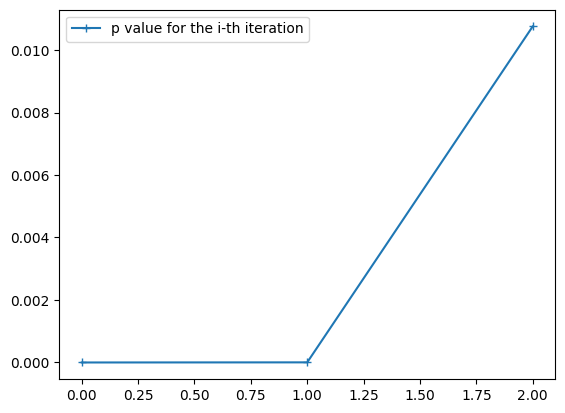

In [9]:
#Question 3b)
def forward_var_selection(X,Y):
    ''' Select the features that have a p value lesser than 0.05'''
    S=[]
    p_list=[]
    while X.any():
        f,p=select_feature(X,Y)
        if p>0.05:
            break
        selected_feature=np.array([X[i][f] for i in range(len(X))])                     #Here is the feature selected by the algorithm
        S.append(selected_feature)
        print(f)
        p_list.append(p)
        X=np.transpose(X)
        X=np.concatenate((X[:f],X[f+1:]),axis=0)                                         #We remove the selected feature from X
        X=np.transpose(X)                                        
        selected_feature=scaler.fit_transform(selected_feature.reshape(-1,1))            #We want to compute the residues
        reg=LinearRegression().fit(selected_feature,Y)
        Y=Y-selected_feature@np.transpose(reg.coef_)                                     #We substract the residues
    print(p_list)
    plt.plot(p_list,marker='+')
    plt.legend(['p value for the i-th iteration'])
    return S,X


Strain,_=forward_var_selection(Xtrain,Ytrain)

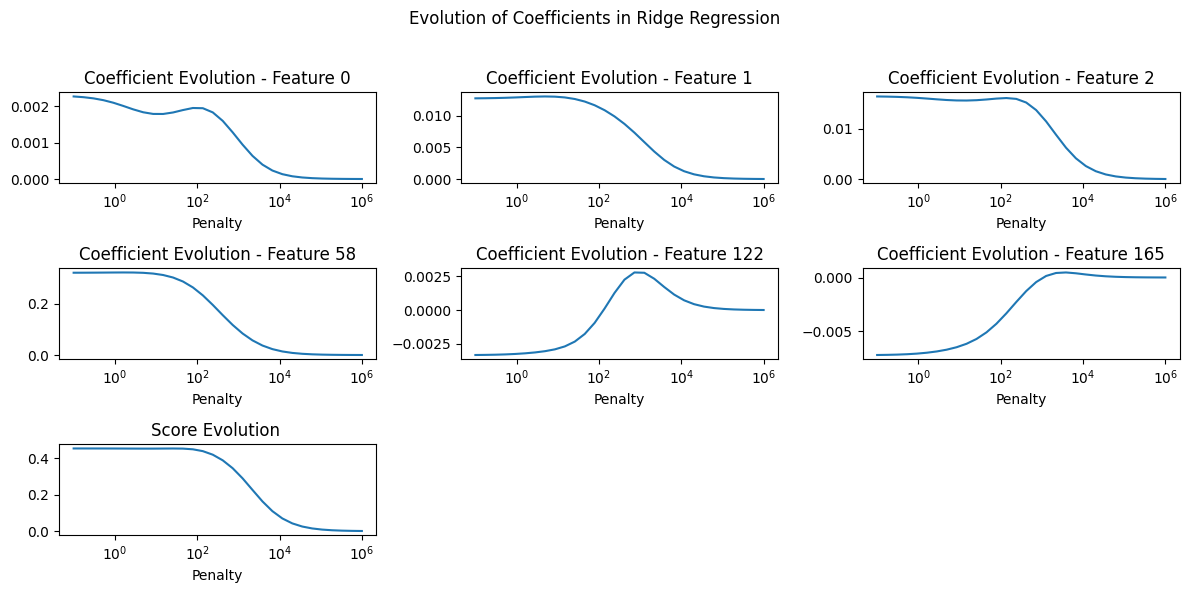

In [10]:
#Question 4

def model_test(model,X,Y,Xtest,Ytest,feature_wanted=[0,1,2,58,122,165]):                 
    ''' Test the performance of a given model on the effect of some specified features
    Feature_wanted corresponds to an array of feature we want to track the evolution in funtion of the penalty, we suppose we want to track less than 6 feature.
    We can use the previous algorithm to know which features are important to track'''
    penalty_log=np.logspace(-1, 6, 30)
    r_list=[]
    coeff_list=[]
    for i in range(30):
        clf = model(alpha=penalty_log[i])
        clf.fit(X, Y)
        r_list.append(clf.score(Xtest,Ytest))
        coeff_list.append(clf.coef_)
    r_list=np.array(r_list)
    coeff_list=np.array(coeff_list)
    plt.figure(figsize=(12, 6))
    n_feature_tracked=0
    for feature in feature_wanted:
        plt.subplot(3, 3, n_feature_tracked + 1) 
        n_feature_tracked+=1
        plt.plot(penalty_log, coeff_list[:, feature], label=f'Feature {feature}')
        plt.xscale('log')
        plt.xlabel('Penalty')
        plt.title(f'Coefficient Evolution - Feature {feature}')
    plt.suptitle('Evolution of Coefficients in ' +str(model).split('.')[-1][:-2]+' Regression')
    plt.subplot(3, 3, n_feature_tracked + 1) 
    plt.plot(penalty_log, r_list, label=f'Feature {feature}')
    plt.xscale('log')
    plt.xlabel('Penalty')
    plt.title(f'Score Evolution ')
    plt.tight_layout(rect=[0, 0, 1, 0.96]) 
    plt.show()

model_test(Ridge,Xtrain,Ytrain,Xtest,Ytest)

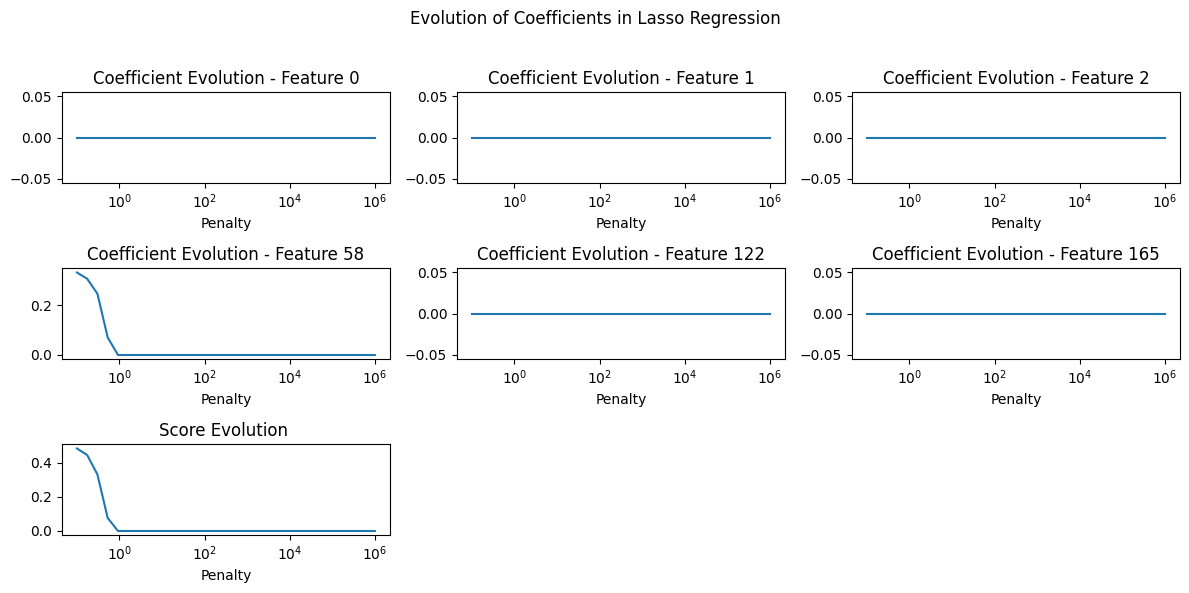

In [11]:
#Question 5

model_test(Lasso,Xtrain,Ytrain,Xtest,Ytest)

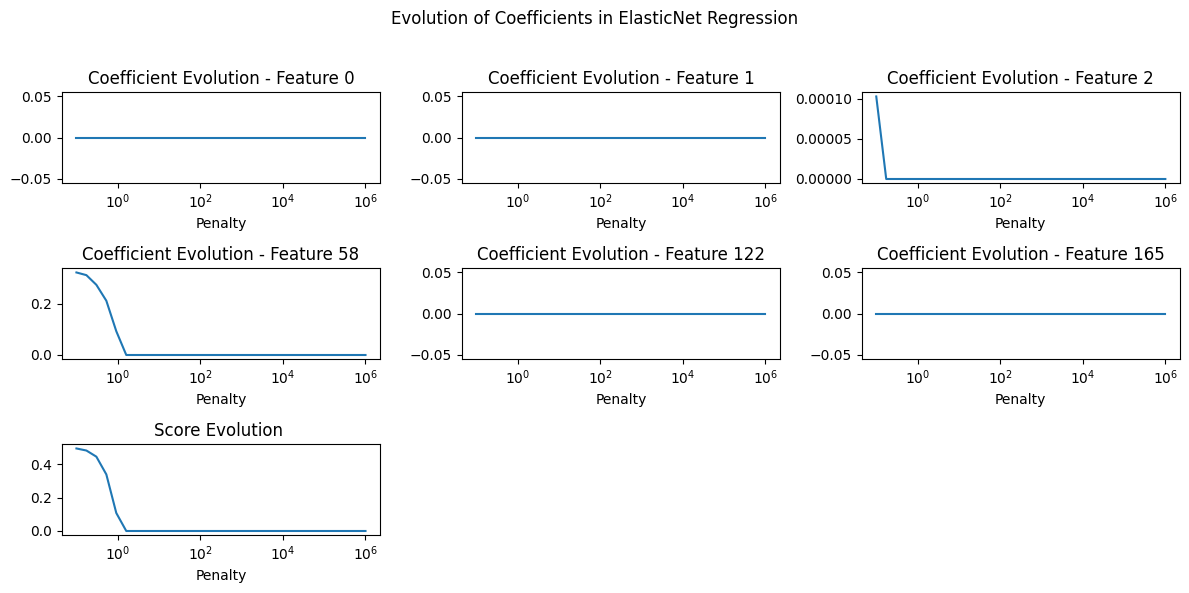

In [12]:
#Question 6

model_test(ElasticNet,Xtrain,Ytrain,Xtest,Ytest)

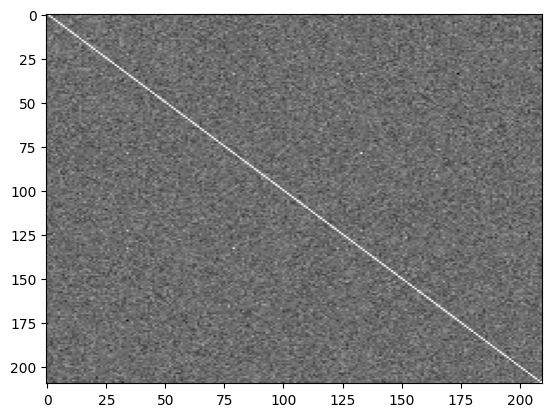

In [13]:
#Question 7a)
plt.imshow(np.transpose(X)@X, cmap='gray',aspect='auto') #viridis

#Question 7b)
def PCA(k,X):
    ''' Give the k principal value and the k principal axes decomposition of X '''
    U,s,Vh=np.linalg.svd(X)
    return s[:k],Vh[:k]

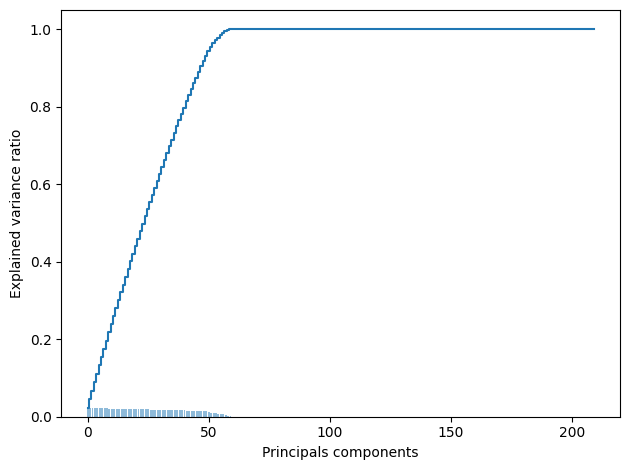

In [14]:
#Question 7c)
#Here we use the formula of the course to compute the variance of approximated X by PCA algorithm
s,Vh=PCA(len(Xtrain[0]),Xtrain)
cum_sum_singvalues = np.cumsum(s)

plt.bar(range(0,len(s)), s/np.sum(s), alpha=0.5, align='center', label='Individual component explained variance')
plt.step(range(0,len(cum_sum_singvalues)), cum_sum_singvalues/np.sum(s), where='mid',label='Cumulative component explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principals components')
plt.tight_layout()
plt.show()

In [15]:
#Question 7d)

for i in range(len(cum_sum_singvalues)):
    if cum_sum_singvalues[i]/np.sum(s)>0.9:
        print('We need',i,'variables to explain more than 90%','of the variance')
        break

We need 47 variables to explain more than 90% of the variance


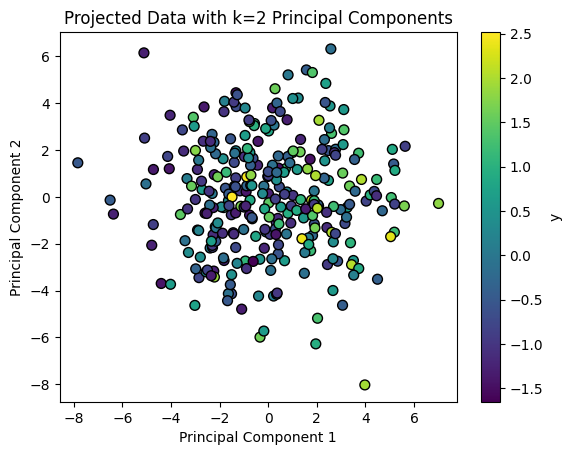

[[-0.07718775  0.04465317  0.07512408  0.01272061  0.07675817 -0.03778022
  -0.04159679 -0.00433848 -0.13713268  0.0230616  -0.0232601  -0.0576124
   0.00024076 -0.01771796  0.20042567 -0.09218975  0.01486425 -0.02123386
   0.11838985  0.06370132  0.09048646  0.00283355  0.02494094  0.16986363
  -0.00495628  0.00592521  0.03118131 -0.02898675  0.06880426  0.02918922
  -0.06594033  0.05059724  0.00049478 -0.07275765  0.21801574  0.01023043
   0.00108363  0.04837967  0.01661265 -0.16740089 -0.03411837  0.02688414
   0.02101407 -0.00900453 -0.14083352  0.14368572 -0.01340735  0.1596948
   0.08742425 -0.09590143 -0.03196422  0.06657233  0.08191689  0.06024198
  -0.03802656  0.11613381  0.03249829  0.09739971  0.13453997 -0.00530302
  -0.01421743 -0.02525978  0.11112748  0.03422652 -0.04049507 -0.03119799
  -0.00077495  0.02603608  0.09121303  0.11050078  0.09688432  0.00679699
  -0.03098031 -0.03143251  0.01677969 -0.02043088 -0.14349355 -0.01481313
  -0.01606228  0.16725248  0.02641326 -0

In [16]:
#Question 7d)

s,Vh=PCA(2,Xtrain)
Xproj=Xtrain@np.transpose(Vh)
scatter = plt.scatter(Xproj[:, 0], Xproj[:, 1], c=Ytrain, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(scatter, label='y')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projected Data with k=2 Principal Components')

plt.show()

print(Vh)
#Interpretation : We see that the features of y are concentrated around the middle of the graph and are close to each other so we don't have a sufficient approximation of X to efficiently compute and understand Y.

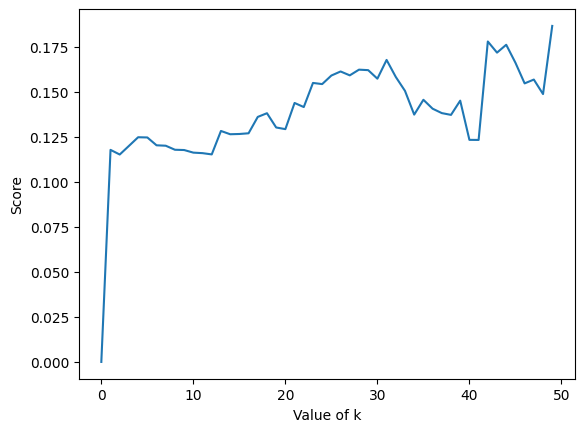

49

In [17]:
#Question 7f)

def best_k_for_projOLS(X,Y,Xtest,Ytest):
    ''' Estimate the best k less than 50 to project our data'''
    index=0
    r_max=-1
    k_max=50
    score_list=np.zeros(k_max)
    for k in range(1,k_max):
        s,Vh=PCA(k,X)
        X_prox=np.transpose(np.array([X@v for v in Vh[:k]]))
        reg=LinearRegression().fit(X_prox,Y)
        score_list[k]=reg.score(np.transpose(np.array([Xtest@v for v in Vh[:k]])),Ytest)
        if score_list[k]>r_max:
            index=k
            r_max=score_list[k]
    plt.plot(score_list)
    plt.ylabel('Score')
    plt.xlabel('Value of k')
    plt.show()
    return index

best_k_for_projOLS(Xtrain,Ytrain,Xtest,Ytest)
#take 5s to run
        

Summarize of the model :

Model         $ \hspace*{8cm}$  Pros: $ \hspace*{10cm}$   Cons:

Ridge regression $\hspace*{4cm}$ Strong theoritical control, Lower dependance on $\lambda$ coefficient, Select correlated features $\hspace*{2cm}$ Consider all variables even irrelevant ones, Shrinks singular values of X

Lasso regression $\hspace*{4cm}$ Select only usefull not correlated features $\hspace*{8cm}$ Often no explicit theoritical solution, high dependance on $\lambda$ coefficient 

Elastic-Net regression $\hspace*{3.3cm}$ Select only usefull feature considering correlation $\hspace*{7cm}$ Often no explicit theoritical solution,  high dependance on $\lambda$ coefficient 
 
PCR algorithm $\hspace*{4.2cm}$ Strong theoritical control, Great tool to reduce dimension, Fast computation $\hspace*{3.6cm}$ Worse error than linear regression, Need more hypothesis on rank(X) than other algorithm
